# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import the model and preferences
import inauguralproject
from inauguralproject import HouseholdSpecializationModelClass as HSMC


# Question 1

**Explain how you solve the model**

/Users/macbookair2018/projects-2023-leif-1/inauguralproject/inauguralproject.py:64: RuntimeWarning: divide by zero encountered in power
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma+1e-8)+par.alpha*HF**((par.sigma-1)/par.sigma+1e-8))**(par.sigma/(par.sigma+1e-8-1))
/Users/macbookair2018/projects-2023-leif-1/inauguralproject/inauguralproject.py:68: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


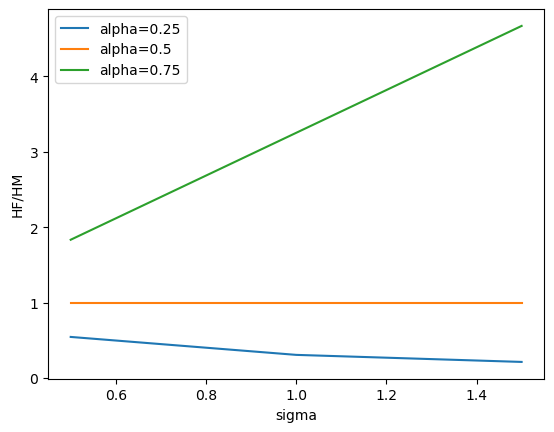

In [2]:
# create instance of the model
model = HSMC()

# define values of alpha and sigma to loop through
alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1.0, 1.5]

# initialize dictionary to store results
resultsHF = {}
resultsHM = {}

# loop through all combinations of alpha and sigma
for alpha in alpha_values:
    for sigma in sigma_values:
        # set values of alpha and sigma in the model
        model.par.alpha = alpha
        model.par.sigma = sigma
        
        # solve the model and store the result
        opt = model.solve_discrete()
        resultsHF[(alpha, sigma)] = opt.HF
        resultsHM[(alpha, sigma)] = opt.HM

# plot the results
fig, ax = plt.subplots()
for alpha in alpha_values:
    y = [resultsHF[(alpha, sigma)]/resultsHM[(alpha,sigma)] for sigma in sigma_values]
    ax.plot(sigma_values, y, label=f"alpha={alpha}")
ax.set_xlabel("sigma")
ax.set_ylabel("HF/HM")
ax.legend()
plt.show()


# Question 2

Explain your code and procedure

In [3]:
# code

# Question 3

Explain your code and procedure

In [4]:
# code

ADD CONCISE CONLUSION.